# Importing Libraries + Setting Path

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

path = r'C:\Users\Chaot\Python stuff\07 - Basics of Machine Learning for Analysts'

# Importing Data Frames.

In [2]:
unscaled = pd.read_csv(os.path.join(path, 'Data Brief + Data Sets', 'Dataset-weather-prediction-dataset-processed.csv'), index_col=False)
unscaled

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


# Scaling dated_df.

In [4]:
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(unscaled))
scaled.columns = unscaled.columns
scaled = scaled.drop(['DATE','MONTH'], axis = 1)
scaled = pd.concat([unscaled[['DATE']],scaled],axis=1)
scaled

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,0.720943,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,20221028,10,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,0.187388,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,20221029,10,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,0.349774,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,20221030,10,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,0.280180,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


# Setting 'Year' Time frame.

In [5]:
dated_scaled = scaled[scaled['DATE'].astype(str).str.contains('2000')]
dated_scaled

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
14610,20000101,1,1.076130,-0.02793,1.187444,1.618161,-1.229941,-0.385392,-0.179228,-1.065304,...,0.169692,0.902363,0.863006,-1.077399,-0.372456,-0.024706,-0.829285,-1.239016,-1.585517,-0.723479
14611,20000102,1,1.076130,-0.02793,1.006770,2.107251,-1.176243,-0.445514,-0.179228,-1.065304,...,1.396477,1.324188,0.322318,-1.183432,0.006276,-0.024706,-1.039536,-0.337751,-0.164486,-0.838511
14612,20000103,1,-0.170720,-0.02793,0.464749,2.046115,-0.907754,-0.445514,-0.179228,-0.206978,...,-1.057093,-0.503721,0.107908,-1.077399,0.751904,-0.024706,-0.679106,-0.638173,-0.164486,-1.039817
14613,20000104,1,0.660514,-0.02793,0.284075,1.251344,-0.768140,0.255911,-0.179228,0.535359,...,0.169692,-0.925546,-0.404813,-0.912459,-0.088407,-0.024706,0.011717,-0.788384,-0.793019,-1.672492
14614,20000105,1,-0.170720,-0.02793,1.277781,1.006799,-0.897015,-0.305229,-0.179228,-0.206978,...,0.783085,-0.222504,-1.728565,-1.195214,-0.100243,-0.024706,-1.039536,-0.908552,-1.066294,-0.637205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14971,20001227,12,-0.170720,-0.02793,0.645423,-3.960519,-1.047368,-0.365351,-0.179228,-0.670938,...,-1.057093,0.199321,-1.486188,-1.065618,-0.052901,-0.024706,-0.588999,-2.801209,-2.951893,-2.420199
14972,20001228,12,0.244897,-0.02793,0.374412,-2.722511,-1.262159,-0.425473,-0.179228,-0.810126,...,0.169692,0.339929,-1.644665,-1.053837,0.018111,-0.024706,-0.619035,-2.620956,-2.869911,-2.017588
14973,20001229,12,1.076130,-0.02793,0.464749,-2.432114,-1.272899,-0.104822,-0.179228,-1.065304,...,-2.283879,0.621146,-0.842956,-0.818208,-0.384292,-0.024706,0.882756,-2.500787,-2.405343,-2.247651
14974,20001230,12,-0.586336,-0.02793,0.103401,-1.698479,-0.982931,-0.425473,0.319230,-0.299770,...,-0.443701,0.339929,-0.255658,-0.888897,2.740247,-0.024706,-0.558963,-2.110239,-2.869911,-2.592747


# Dendogram - Single.

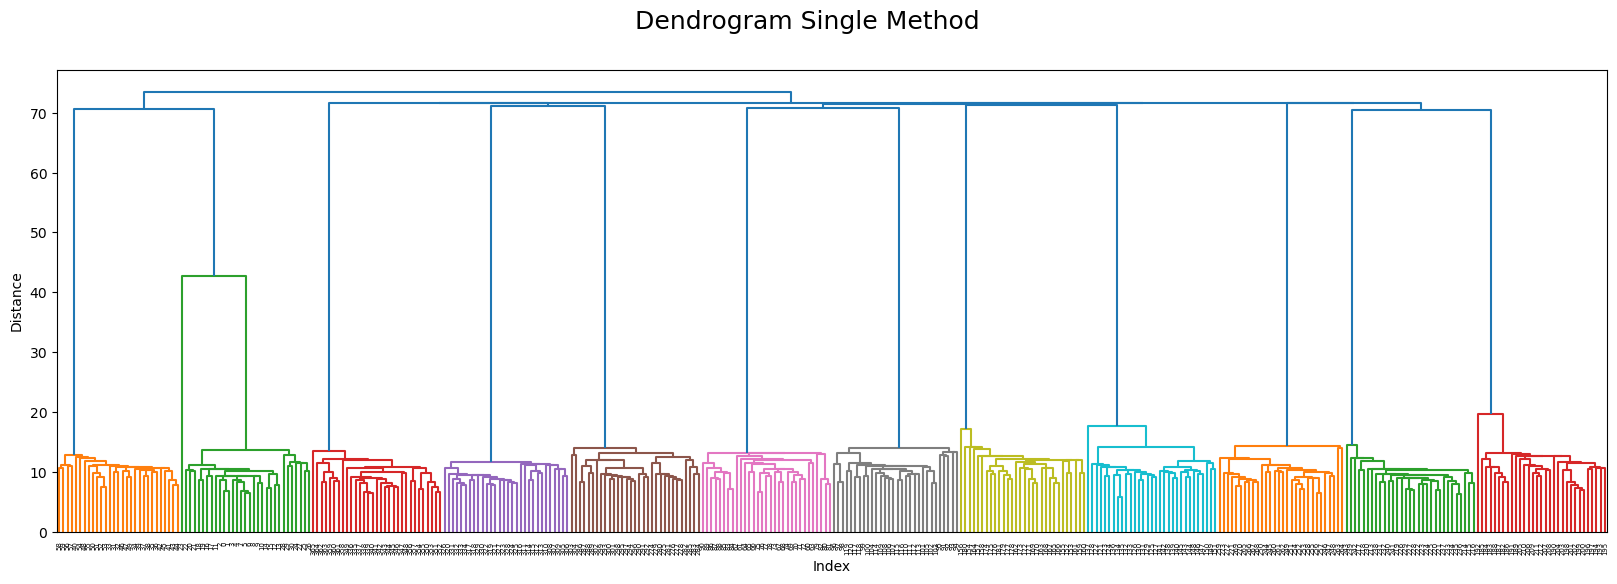

In [6]:
distance_single = linkage(dated_scaled,method='single')
plt.figure(figsize=(20,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle('Dendrogram Single Method',fontsize=18)
plt.savefig(os.path.join(path, 'Unsupervised', '2.1_dendrogram_single.png'), bbox_inches='tight')
plt.show()

# Dendogram - Complete.

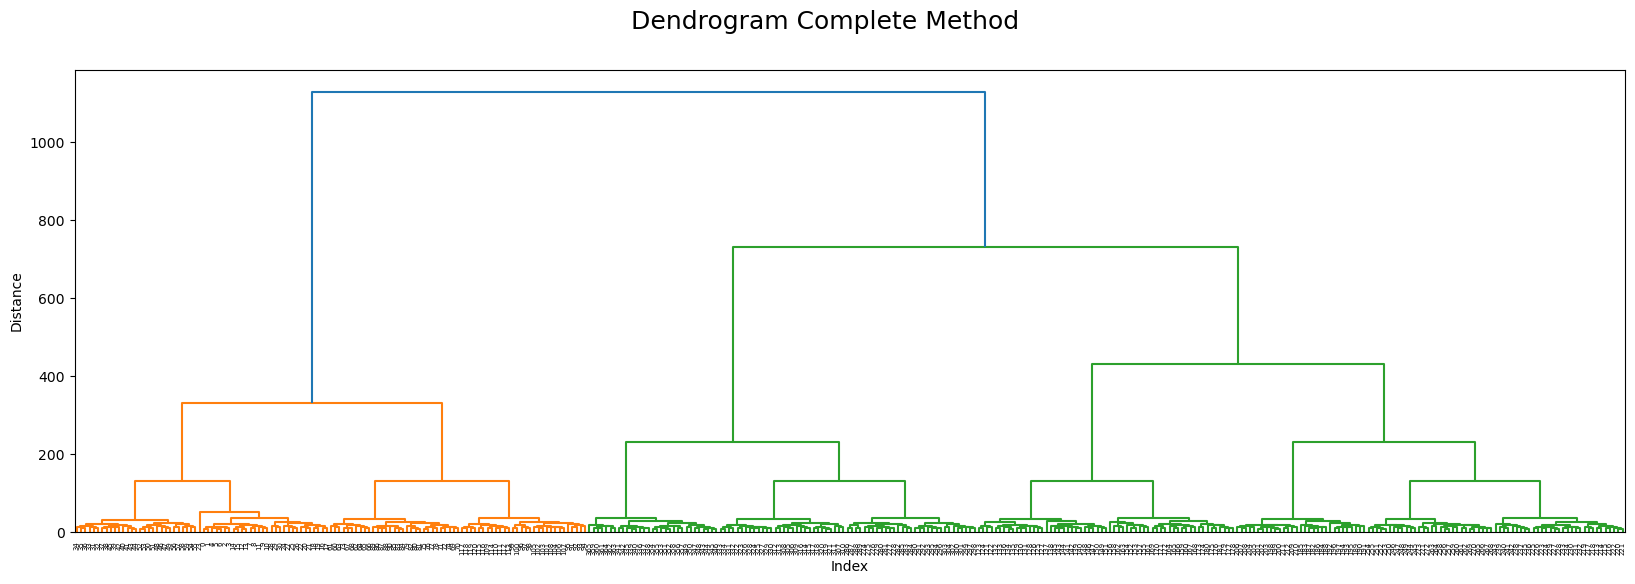

In [7]:
distance_single = linkage(dated_scaled,method='complete')
plt.figure(figsize=(20,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle('Dendrogram Complete Method',fontsize=18)
plt.savefig(os.path.join(path, 'Unsupervised', '2.1_dendrogram_complete.png'), bbox_inches='tight')
plt.show()

# Dendogram - Average.

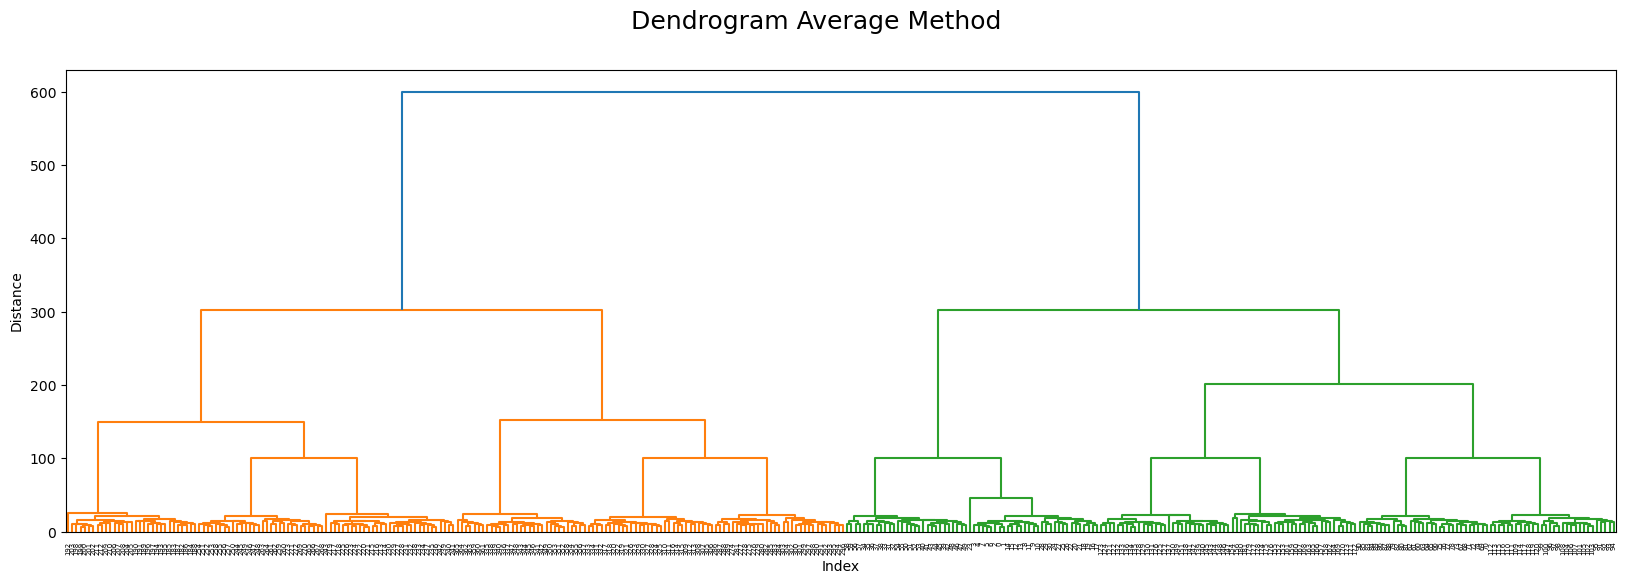

In [22]:
distance_single = linkage(dated_scaled,method='average')
plt.figure(figsize=(20,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle('Dendrogram Average Method',fontsize=18)
plt.savefig(os.path.join(path, 'Unsupervised', '2.1_dendrogram_average.png'), bbox_inches='tight')
plt.show()

# Dendogram - Ward.

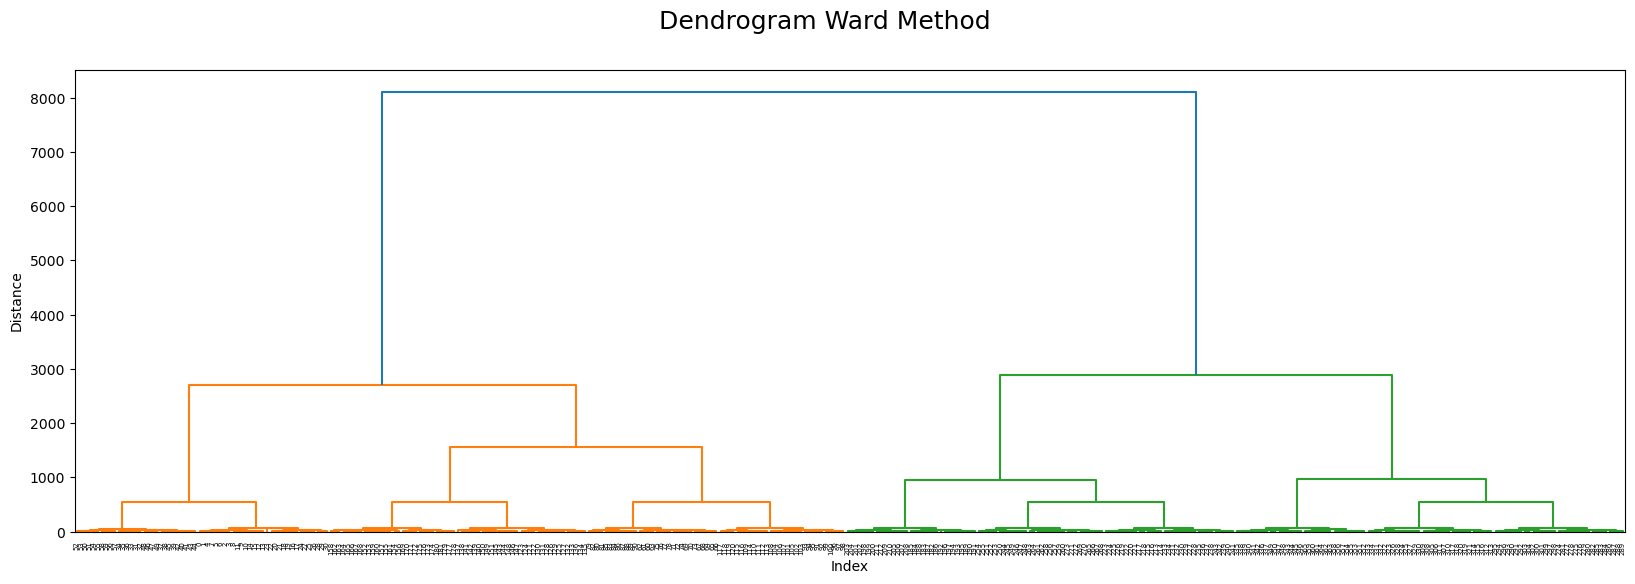

In [9]:
distance_single = linkage(dated_scaled,method='ward')
plt.figure(figsize=(20,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle('Dendrogram Ward Method',fontsize=18)
plt.savefig(os.path.join(path, 'Unsupervised', '2.1_dendrogram_ward.png'), bbox_inches='tight')
plt.show()

# Creating Principal Component Analysis.

In [14]:
dated_scaled_2 = dated_scaled.drop(columns=['DATE','MONTH'])
dated_scaled_2

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
14610,1.076130,-0.02793,1.187444,1.618161,-1.229941,-0.385392,-0.179228,-1.065304,-1.017527,-0.723027,...,0.169692,0.902363,0.863006,-1.077399,-0.372456,-0.024706,-0.829285,-1.239016,-1.585517,-0.723479
14611,1.076130,-0.02793,1.006770,2.107251,-1.176243,-0.445514,-0.179228,-1.065304,-0.922462,-0.554419,...,1.396477,1.324188,0.322318,-1.183432,0.006276,-0.024706,-1.039536,-0.337751,-0.164486,-0.838511
14612,-0.170720,-0.02793,0.464749,2.046115,-0.907754,-0.445514,-0.179228,-0.206978,-1.112591,-0.952948,...,-1.057093,-0.503721,0.107908,-1.077399,0.751904,-0.024706,-0.679106,-0.638173,-0.164486,-1.039817
14613,0.660514,-0.02793,0.284075,1.251344,-0.768140,0.255911,-0.179228,0.535359,-0.881720,-0.891636,...,0.169692,-0.925546,-0.404813,-0.912459,-0.088407,-0.024706,0.011717,-0.788384,-0.793019,-1.672492
14614,-0.170720,-0.02793,1.277781,1.006799,-0.897015,-0.305229,-0.179228,-0.206978,-0.596526,-0.385810,...,0.783085,-0.222504,-1.728565,-1.195214,-0.100243,-0.024706,-1.039536,-0.908552,-1.066294,-0.637205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14971,-0.170720,-0.02793,0.645423,-3.960519,-1.047368,-0.365351,-0.179228,-0.670938,-0.705172,-0.462450,...,-1.057093,0.199321,-1.486188,-1.065618,-0.052901,-0.024706,-0.588999,-2.801209,-2.951893,-2.420199
14972,0.244897,-0.02793,0.374412,-2.722511,-1.262159,-0.425473,-0.179228,-0.810126,-1.058269,-1.060245,...,0.169692,0.339929,-1.644665,-1.053837,0.018111,-0.024706,-0.619035,-2.620956,-2.869911,-2.017588
14973,1.076130,-0.02793,0.464749,-2.432114,-1.272899,-0.104822,-0.179228,-1.065304,-1.261978,-1.090901,...,-2.283879,0.621146,-0.842956,-0.818208,-0.384292,-0.024706,0.882756,-2.500787,-2.405343,-2.247651
14974,-0.586336,-0.02793,0.103401,-1.698479,-0.982931,-0.425473,0.319230,-0.299770,-1.275559,-1.090901,...,-0.443701,0.339929,-0.255658,-0.888897,2.740247,-0.024706,-0.558963,-2.110239,-2.869911,-2.592747


In [15]:
features = dated_scaled_2
scaled_features = StandardScaler().fit_transform(features)

In [16]:
#Run the PCA model, reducing to two components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features)

In [17]:
principalComponents

array([[-1.23036700e+01,  3.98446760e+00],
       [-1.12759152e+01,  4.82802132e+00],
       [-1.07957034e+01,  3.59391850e+00],
       [-9.74437881e+00,  2.30581200e+00],
       [-1.03624766e+01,  3.88522774e+00],
       [-9.70450283e+00,  2.96605469e+00],
       [-1.01674951e+01,  3.68709163e+00],
       [-9.72170322e+00,  3.31560796e+00],
       [-1.13945210e+01,  4.38932930e+00],
       [-1.21504037e+01,  6.26039789e+00],
       [-1.18739146e+01,  7.86743859e+00],
       [-1.17775323e+01,  6.42765870e+00],
       [-1.22264471e+01,  4.23238632e+00],
       [-1.18507912e+01,  4.03433489e+00],
       [-1.24492128e+01,  6.05781149e+00],
       [-1.24729375e+01,  5.92770354e+00],
       [-1.05074644e+01,  2.96823808e+00],
       [-1.04253014e+01,  2.81670101e-01],
       [-9.99009103e+00,  5.52423534e+00],
       [-1.08486538e+01,  5.82646159e+00],
       [-1.09025033e+01,  2.78375708e+00],
       [-1.31040507e+01,  1.30608532e+00],
       [-1.46155385e+01,  2.50207961e+00],
       [-1.

In [19]:
PCA_df = pd.DataFrame(principalComponents, columns = ['PCA_1','PCA_2'])
PCA_df

,PCA_1,PCA_2
0,-12.303670,3.984468
1,-11.275915,4.828021
2,-10.795703,3.593919
3,-9.744379,2.305812
4,-10.362477,3.885228
...,...,...
361,-11.870624,-8.194647
362,-12.631110,-7.532162
363,-13.192649,-6.635848
364,-13.195805,-3.368171


In [21]:
PCA_df.to_csv(os.path.join(path, 'Data Brief + Data Sets', 'PCA_df.csv'), index = False)